The first ten rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3    

<ipython-input-33-01ac60333df6>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='coolwarm')  # Updated color palette


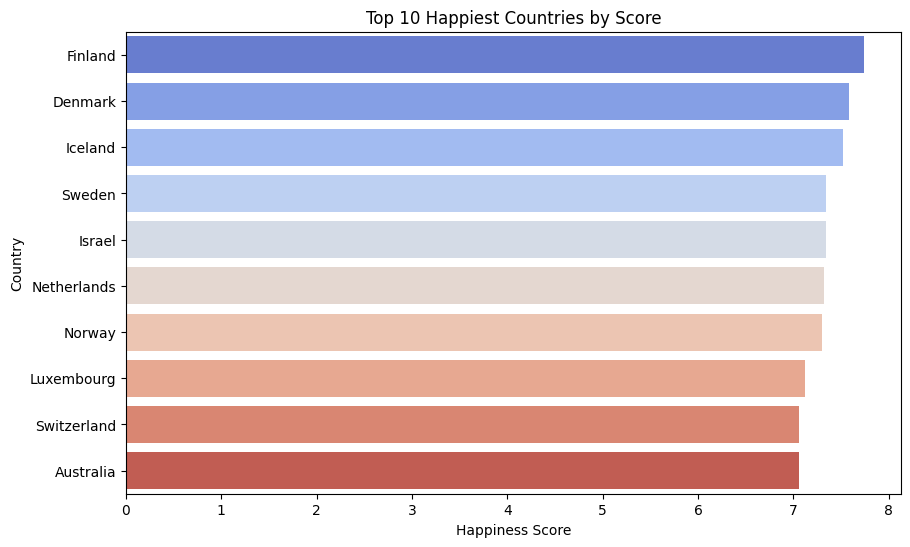

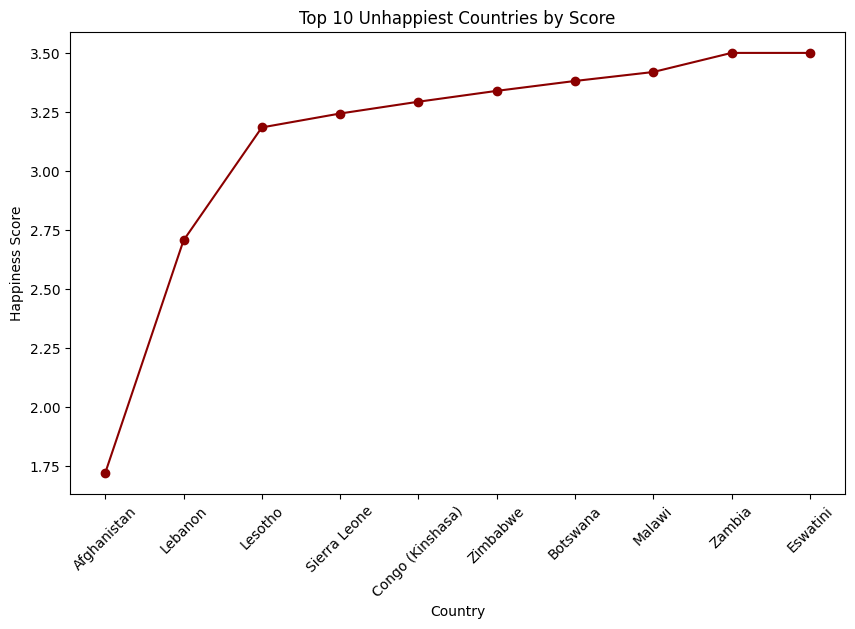

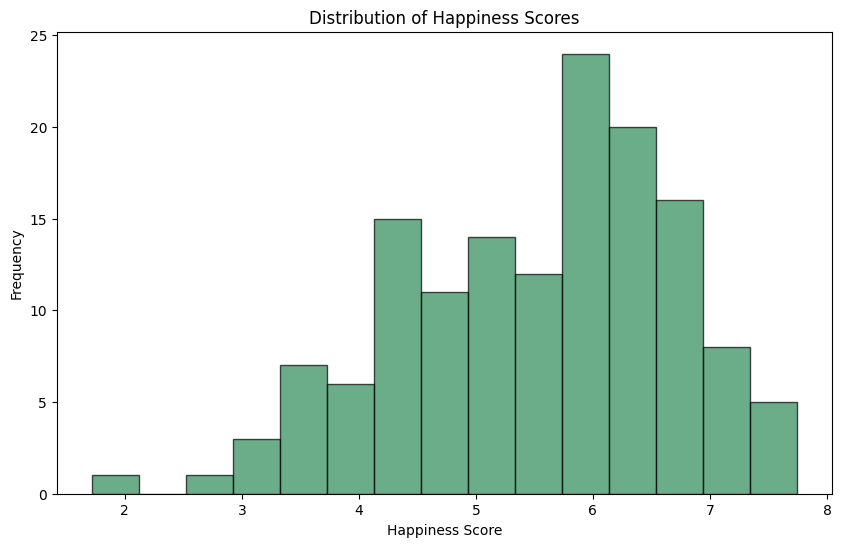

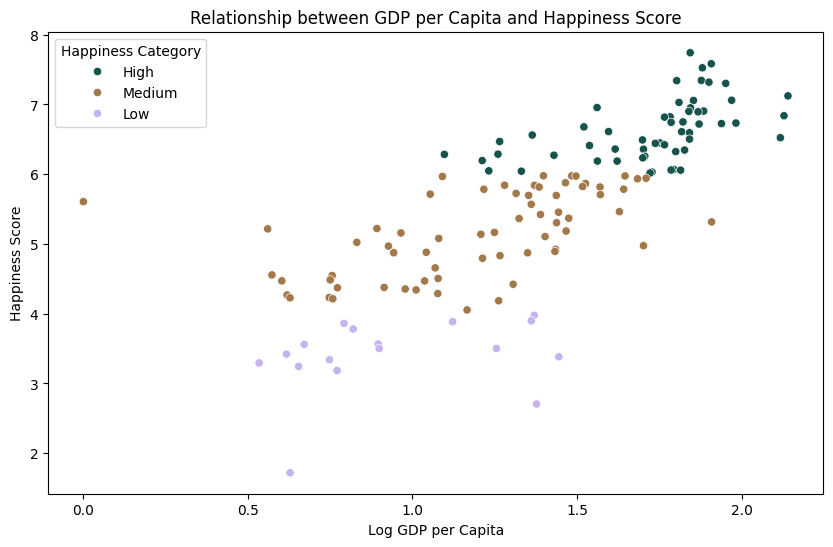


South Asia dataset saved to 'south_asia_happiness.csv'.
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual happiness category  
92                       0.115                

<ipython-input-33-01ac60333df6>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, top_3_me]), palette='plasma')  # Updated palette to 'plasma'


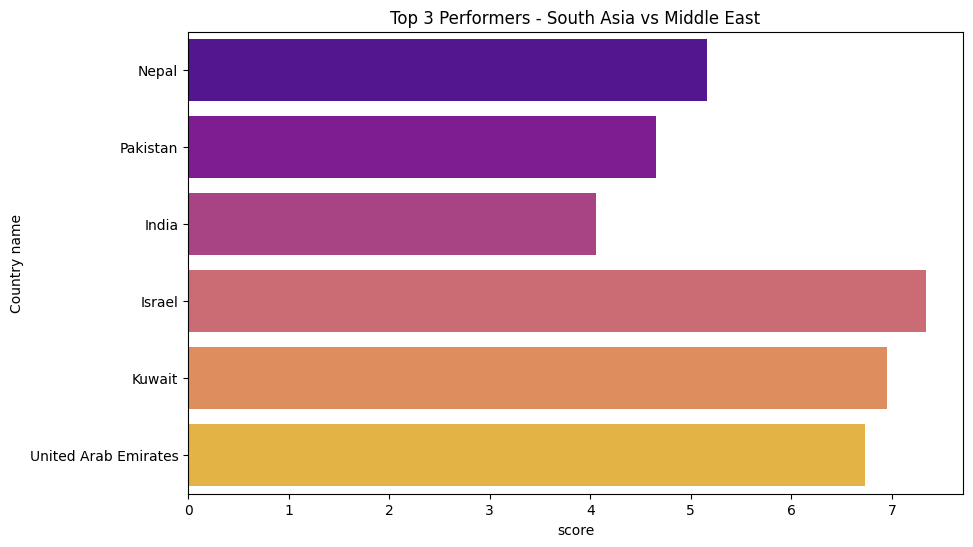

<ipython-input-33-01ac60333df6>:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([bottom_3_sa, bottom_3_me]), palette='magma')  # Updated palette to 'magma'


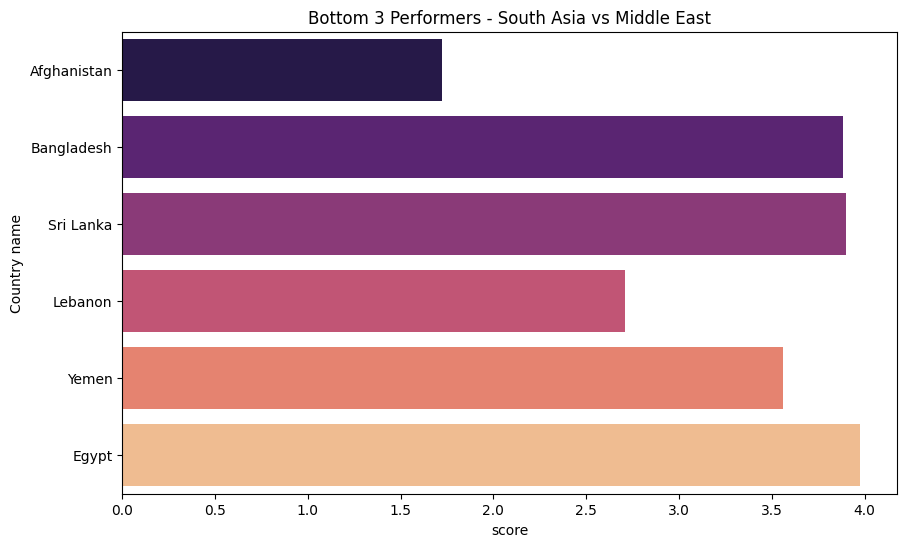

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('/content/WHR-2024-5CS037.csv')

# Display the first ten rows of the dataset
print("The first ten rows of the dataset:")
print(dataset.head(10))

# Identify the number of rows and columns in the dataset
rows, columns = dataset.shape
print(f"\nThe dataset has {rows} rows and {columns} columns.")

# List all the columns and their data types
print("\nColumns and their data types:")
print(dataset.dtypes)

# Basic statistics
mean_score = dataset['score'].mean()
median_score = dataset['score'].median()
std_dev_score = dataset['score'].std()

print(f"\nMean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")

# Identify the country with the highest and lowest happiness scores
max_happiness_country = dataset.loc[dataset['score'].idxmax()]
min_happiness_country = dataset.loc[dataset['score'].idxmin()]

print(f"\nCountry with the Highest Score: {max_happiness_country['Country name']} (Score: {max_happiness_country['score']})")
print(f"Country with the Lowest Score: {min_happiness_country['Country name']} (Score: {min_happiness_country['score']})")

# Check for missing values in the dataset
missing_values = dataset.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Filter and sort the dataset for scores above 7.5
filtered_dataset = dataset[dataset["score"] > 7.5]
sorted_dataset = filtered_dataset.sort_values(by="Log GDP per capita", ascending=False)
top_10_rows = sorted_dataset.head(10)

print("\nTop 10 rows of the filtered and sorted dataset:")
print(top_10_rows)

# Creating a new column for happiness categories
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

dataset['happiness category'] = dataset['score'].apply(categorize_happiness)
print("\nUpdated dataset with 'happiness category' column:")
print(dataset[['Country name', 'score', 'happiness category']])

# Plot: Top 10 Happiest Countries by Score
top_10_happiest = dataset.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='coolwarm')  # Updated color palette
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

# Plot: Top 10 Unhappiest Countries by Score
top_10_unhappiest = dataset.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='darkred')  # Changed color to dark red
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

# Histogram: Distribution of Happiness Scores
plt.figure(figsize=(10, 6))
plt.hist(dataset['score'], bins=15, color='seagreen', alpha=0.7, edgecolor='black')  # Changed color to seagreen
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: GDP per Capita vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Log GDP per capita', y='score', hue='happiness category', palette='cubehelix')  # Updated palette
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

# Save South Asian countries data to a CSV file
south_asia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
south_asia_df = dataset[dataset['Country name'].isin(south_asia)]
south_asia_df.to_csv("south_asia_happiness.csv", index=False)
print("\nSouth Asia dataset saved to 'south_asia_happiness.csv'.")
print(south_asia_df.head())

# Compare South Asia and Middle East Happiness Scores
middle_east = ['Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen']
middle_east_df = dataset[dataset['Country name'].isin(middle_east)]

# Descriptive statistics for both regions
south_asia_mean = south_asia_df['score'].mean()
middle_east_mean = middle_east_df['score'].mean()
south_asia_std = south_asia_df['score'].std()
middle_east_std = middle_east_df['score'].std()

print(f"\nSouth Asia - Mean Score: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean Score: {middle_east_mean}, Standard Deviation: {middle_east_std}")

# Bar Charts: Top 3 Performers and Bottom 3 Performers
top_3_sa = south_asia_df.nlargest(3, 'score')
bottom_3_sa = south_asia_df.nsmallest(3, 'score')
top_3_me = middle_east_df.nlargest(3, 'score')
bottom_3_me = middle_east_df.nsmallest(3, 'score')

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, top_3_me]), palette='plasma')  # Updated palette to 'plasma'
plt.title("Top 3 Performers - South Asia vs Middle East")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([bottom_3_sa, bottom_3_me]), palette='magma')  # Updated palette to 'magma'
plt.title("Bottom 3 Performers - South Asia vs Middle East")
plt.show()
